# Importation des librairies

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as pyo
import numpy as np
import scipy
from statsmodels.stats import weightstats
import seaborn as sns

# Importation des bases

In [2]:
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")

# Nettoyage de la base

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainn = train.drop_duplicates()
doublons = train.shape[0] - trainn.shape[0]
doublons_pct = doublons/train.shape[0]*100
print("Il y a", doublons, ", soit", round(doublons_pct, 4), "% de doublons dans la table Train.")

Il y a 0 , soit 0.0 % de doublons dans la table Train.


In [5]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [6]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [7]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


# DATAVIZ

In [8]:
def legend_embarked(liste) :
    L = liste.to_list()
    for k in range(len(L)) :
        if L[k] == "C" :
            L[k] = "Cherbourg"
        elif L[k] == "Q" :
            L[k] = "Queenstown"
        elif L[k] == "S" :
            L[k] = "Southampton"
    return L

def process_age(df) :
    cut_points = [0, 5, 18, 30, 60, 100]
    labels = ["Baby", "Child", "Junior", "Adult", "Senior"]
    df["Age_categorie"] = pd.cut(df["Age"], cut_points, labels = labels)
    return df

def process_fare(df) :
    cut_points = [0, 8, 15, 30, 1000]
    labels = ["Cheap", "Low", "High", "Expensive"]
    df["Fare_categorie"] = pd.cut(df["Fare"], cut_points, labels = labels)
    return df

In [9]:
train.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,-0.005,-0.035,0.03,-0.058,-0.0017,0.013
Survived,-0.005,1.0,-0.34,-0.075,-0.034,0.083,0.26
Pclass,-0.035,-0.34,1.0,-0.33,0.082,0.017,-0.55
Age,0.03,-0.075,-0.33,1.0,-0.23,-0.18,0.089
SibSp,-0.058,-0.034,0.082,-0.23,1.0,0.41,0.16
Parch,-0.0017,0.083,0.017,-0.18,0.41,1.0,0.22
Fare,0.013,0.26,-0.55,0.089,0.16,0.22,1.0


In [10]:
train.Survived.groupby(train.Sex).value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
labels1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().index
labels2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().index
values1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().values
values2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().values

fig1 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du sexe"
# Change the bar mode
fig1.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig1.show()

In [12]:
train.Survived.groupby(train.Pclass).value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [13]:
labels1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().index
labels2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().index
values1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().values
values2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().values


fig2 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de la classe de ticket"
# Change the bar mode
fig2.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig2.show()

In [14]:
train.Survived.groupby(train.Embarked).value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [15]:
labels1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().index
labels2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().index
values1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().values
values2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().values

fig3 = go.Figure(data=[
    go.Bar(name='Morts', x=legend_embarked(labels1), y=values1),
    go.Bar(name='En vie', x=legend_embarked(labels2), y=values2)
])

title = "Etat des passager en fonction du point d'embarquement"
# Change the bar mode
fig3.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig3.show()

In [16]:
train = process_age(train)
train.Survived.groupby(train.Age_categorie).value_counts()

Age_categorie  Survived
Baby           1            31
               0            13
Child          0            56
               1            39
Junior         0           299
               1           148
Adult          0           164
               1           118
Senior         0            17
               1             4
Name: Survived, dtype: int64

In [17]:
labels1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().index
labels2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().index
values1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().values
values2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().values


fig4 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de leur âge"
# Change the bar mode
fig4.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig4.show()

In [18]:
train = process_fare(train)
train.Survived.groupby(train.Fare_categorie).value_counts()

Fare_categorie  Survived
Cheap           0           175
                1            51
Low             0           155
                1            62
High            0           107
                1            92
Expensive       1           134
                0            98
Name: Survived, dtype: int64

In [19]:
labels1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().index
labels2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().index
values1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().values
values2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().values


fig6 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du prix du ticket"
# Change the bar mode
fig6.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig6.show()

In [20]:
a = train.Fare.groupby(train.Embarked).mean()
a

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [21]:
title = "Moyenne des tarifs par lieu d'embarquement"

fig7 = px.bar(a, x = legend_embarked(a.index), y = a.values, title = {'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig7.show()

In [22]:
b = train.Embarked.groupby(train.Embarked).count()
b

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [78]:
train.Sex.groupby(train.Embarked).value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

In [82]:
labels1 = train.Sex[train.Sex == "male"].groupby(train.Embarked).count().index
labels2 = train.Sex[train.Sex == "female"].groupby(train.Embarked).count().index
values1 = train.Sex[train.Sex == "male"].groupby(train.Embarked).count().values
values2 = train.Sex[train.Sex == "female"].groupby(train.Embarked).count().values


fig10 = go.Figure(data=[
    go.Bar(name='male', x=legend_embarked(labels1), y=values1),
    go.Bar(name='female', x=legend_embarked(labels2), y=values2)
])

title = "Sexe des passager à l'embarquement"
# Change the bar mode
fig10.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig10.show()

In [80]:
title = "Nombre de passagers par lieu d'embarquement"

fig9 = px.pie(names = legend_embarked(b.index), values = b.values, title = {'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig9.show()

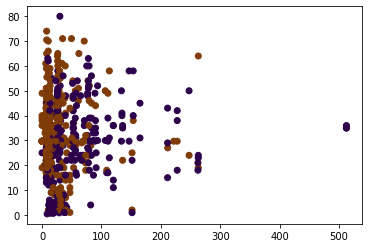

In [24]:
fig8 = plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")
fig8

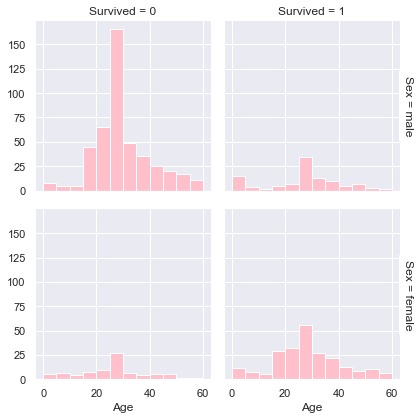

In [25]:
sns.set(style="darkgrid")
g = sns.FacetGrid(train, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Age", color="pink", bins=bins)

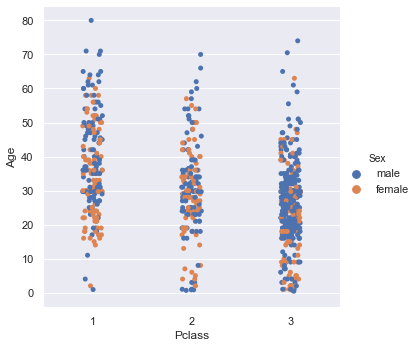

In [26]:
sns.catplot(x="Pclass", y="Age", data=train, hue = "Sex")

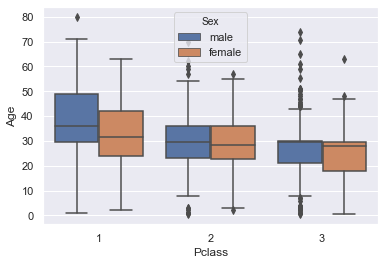

In [27]:
sns.boxplot(x="Pclass", y="Age", data=train, hue = "Sex")

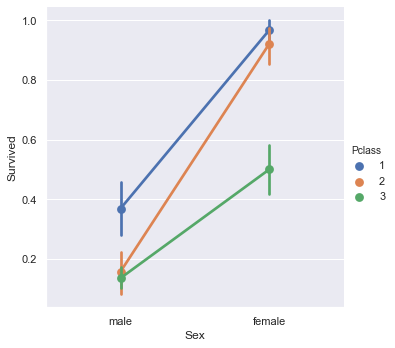

In [28]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=train)

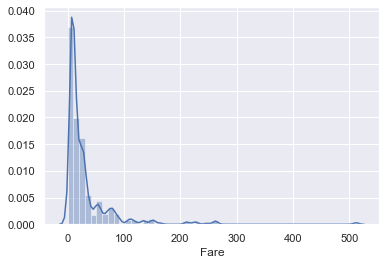

In [29]:
sns.distplot(train['Fare'])

# Tests Statistiques

In [30]:
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)
train = process_age(train)
train = process_fare(train)

In [31]:
train_stats = train
del train_stats['Name']
del train_stats['Ticket']
del train_stats['Age_categorie']
del train_stats['Fare_categorie']

In [32]:
train_stats = pd.get_dummies(train_stats)

In [33]:
train_stats.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [34]:
train_stats.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.0,-0.005,-0.035,0.03,-0.058,-0.0017,0.013,-0.043,0.043,-0.0012,-0.034,0.022
Survived,-0.005,1.0,-0.34,-0.075,-0.034,0.083,0.26,0.54,-0.54,0.17,0.0045,-0.15
Pclass,-0.035,-0.34,1.0,-0.33,0.082,0.017,-0.55,-0.13,0.13,-0.25,0.22,0.076
Age,0.03,-0.075,-0.33,1.0,-0.23,-0.18,0.089,-0.089,0.089,0.034,-0.013,-0.022
SibSp,-0.058,-0.034,0.082,-0.23,1.0,0.41,0.16,0.12,-0.12,-0.06,-0.027,0.069
Parch,-0.0017,0.083,0.017,-0.18,0.41,1.0,0.22,0.25,-0.25,-0.012,-0.082,0.062
Fare,0.013,0.26,-0.55,0.089,0.16,0.22,1.0,0.18,-0.18,0.27,-0.12,-0.16
Sex_female,-0.043,0.54,-0.13,-0.089,0.12,0.25,0.18,1.0,-1.0,0.085,0.075,-0.12
Sex_male,0.043,-0.54,0.13,0.089,-0.12,-0.25,-0.18,-1.0,1.0,-0.085,-0.075,0.12
Embarked_C,-0.0012,0.17,-0.25,0.034,-0.06,-0.012,0.27,0.085,-0.085,1.0,-0.15,-0.78


In [83]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Sex_female, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print('pvalue =', p, 'alpha =', alpha)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

pvalue = 3.7799096665574906e-58 alpha = 0.05
Les deux variables ne sont pas indépendantes.


In [84]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Age < 18, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print('pvalue =', p, 'alpha =', alpha)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

pvalue = 0.00034261369274988666 alpha = 0.05
Les deux variables ne sont pas indépendantes.


In [85]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Fare, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print('pvalue =', p, 'alpha =', alpha)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

pvalue = 1.553812876621213e-11 alpha = 0.05
Les deux variables ne sont pas indépendantes.


In [86]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Pclass, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print('pvalue =', p, 'alpha =', alpha)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

pvalue = 1.1813624785477922e-22 alpha = 0.05
Les deux variables ne sont pas indépendantes.


In [64]:
def legend_embarked(liste) :
    L = liste.to_list()
    for k in range(len(L)) :
        if L[k] == "C" :
            L[k] = "Cherbourg"
        elif L[k] == "Q" :
            L[k] = "Queenstown"
        elif L[k] == "S" :
            L[k] = "Southampton"
    return L

In [49]:
legend_embarked([train.Sex.groupby(train.Embarked).value_counts().index[i][0] for i in range(6)])

['Cherbourg',
 'Cherbourg',
 'Queenstown',
 'Queenstown',
 'Southampton',
 'Southampton']

In [69]:
train.Sex.groupby(train.Embarked).value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64